## Building a simple neural network

In [139]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [140]:
#loading the iris dataset
iris = load_iris()

In [141]:
# Headers of the data are petal_length, petal_width, sepal_length, sepal_width
X = iris.data
y = iris.target

In [142]:
X.shape, y.shape

((150, 4), (150,))

In [143]:
#Reshaping the y cause we can't just multiply these things and making the y to 2d Array 
y = y.reshape(-1, 1)
y.shape

(150, 1)

In [144]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [145]:
# We need to do one hot encoding for the y because the NN will not be able to handle i.e putting single integer can deceive the network into believing that the class is greater than the other classes
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

In [146]:
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [147]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_encoded,test_size=0.2,random_state=42)

## Neural Network Architecture

This neural network has:
- 4 input neurons (for the 4 features)
- 8 hidden neurons in one hidden layer
- 3 output neurons (for the 3 classes)

<img src="../images/Day3:BSNN.png" alt="Description" width="50%" height="auto"/>


Create your own NN visualizations at: https://alexlenail.me/NN-SVG/index.html

In [149]:
input_size = X_train.shape[1]  # Number of features
hidden_size = 8
output_size = y_train.shape[1]  # Number of classes
lr=0.01
epochs = 1000
input_size, hidden_size, output_size

(4, 8, 3)

In [150]:
def get_activation(name: str):
    if name == 'sigmoid':
        act = lambda x: 1 / (1 + np.exp(-x))
        der = lambda x: x * (1 - x)
    elif name == 'tanh':
        act = lambda x: np.tanh(x)
        der = lambda x: 1 - np.tanh(x) ** 2
    elif name == 'relu':
        act = lambda x: np.maximum(0, x)
        der = lambda x: np.where(x > 0, 1, 0) # x is 1 for every value greater than 0
    elif name == 'softmax':
        act = lambda x: np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)
        der = lambda x: x * (1 - x)
    elif name == 'leaky_relu':
        act = lambda x: np.where(x > 0, x, 0.01 * x)
        der = lambda x: np.where(x > 0, 1, 0.01)
    else:
        raise ValueError(f"Unknown activation function: {name}")
    return act, der

In [151]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [152]:
#cross entropy loss function
def cross_entropy_loss(y_true, y_pred):
    return -np.mean(np.sum(y_true* np.log(y_pred + 1e-9), axis=1))


In [153]:
#accuracy metrics
def accuracy_score(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [154]:
# Train Model
def train_model(activation_name):
    activation, activation_derivative = get_activation(activation_name)
    loss_history = []
    np.random.seed(42)
    # 4*8
    w1 = np.random.randn(input_size, hidden_size) * 0.01
    w2 = np.random.randn(hidden_size, output_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    b2 = np.zeros((1, output_size))

    #training starts here
    for epoch in range(epochs):
        z1 = np.dot(X_train, w1) + b1 # Applying on the weight and bias
        a1 = activation(z1)  # applying activation function
        z2 = np.dot(a1, w2) + b2 # For Hidden layer to output layer z2 = a1 * w2 + b2
        a2 = softmax(z2)  # Applying softmax activation function for output layer
        # Calculate loss
        loss = cross_entropy_loss(y_train, a2)
        loss_history.append(loss)

        # Calculate accuracy
        acc = accuracy_score(y_train, a2)

        # Backpropagation
        dz2 = a2 - y_train
        dw2 = np.dot(a1.T, dz2)
        db2 = np.sum(dz2, axis=0, keepdims=True)
        dz1 = np.dot(dz2, w2.T) * activation_derivative(a1)
        dw1 = np.dot(X_train.T, dz1) / X_train.shape[0]
        db1 = np.sum(dz1, axis=0, keepdims=True)

        # Update weights and biases
        w1 -= lr * dw1
        w2 -= lr * dw2
        b1 -= lr * db1
        b2 -= lr * db2

    #predict
    def predict(X):
        a1 = activation(np.dot(X, w1) + b1)
        a2 = softmax(np.dot(a1, w2) + b2)
        return a2
    y_pred = predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    return loss_history, test_accuracy


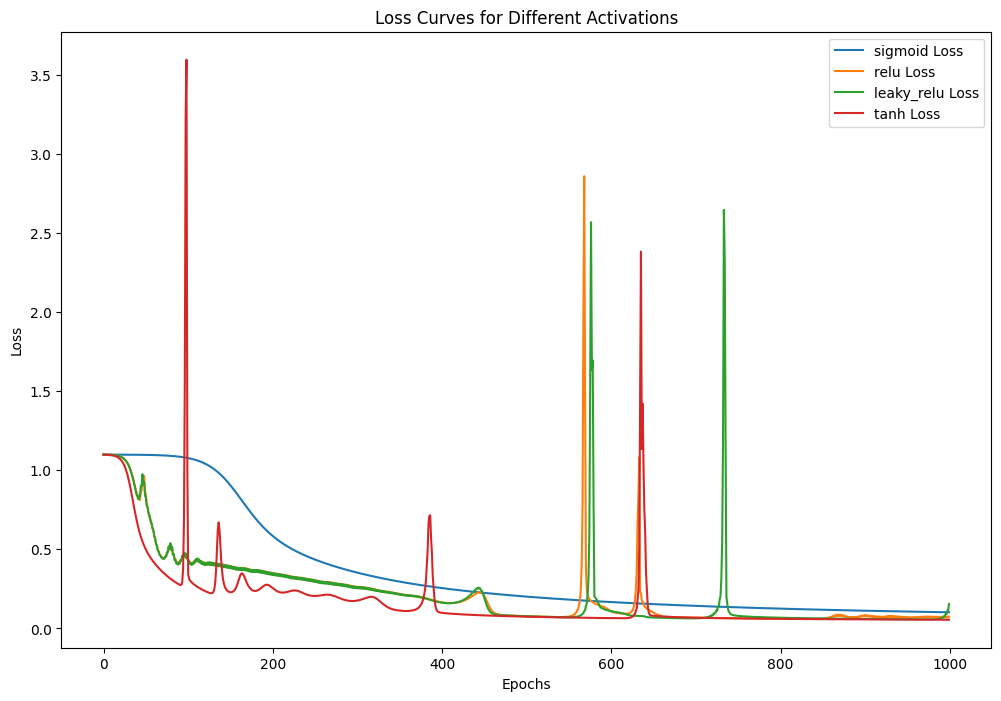

In [155]:
activations = ["sigmoid", "relu", "leaky_relu", "tanh"]
accuracies ={}
plt.figure(figsize=(12, 8))
for activation in activations:
    losses, acc = train_model(activation)
    accuracies[activation] = acc
    plt.plot(losses, label=f"{activation} Loss")
plt.title("Loss Curves for Different Activations")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()